In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data = pd.read_csv(r"F:\IBM\DATA COLLECTION\DOWNLOADING DATASET\Admission_Predict.csv")
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


## Handling Missing Values 

In [34]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

# data.isnull().sum()

There is No Missing Values


C:\Users\Saravana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SOP', ylabel='Density'>

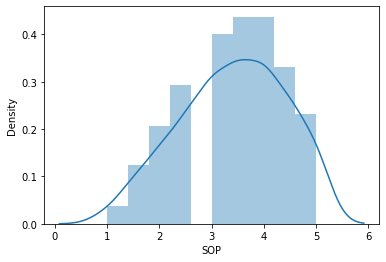

In [35]:
sns.distplot(data['SOP'])

C:\Users\Saravana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA', ylabel='SOP'>

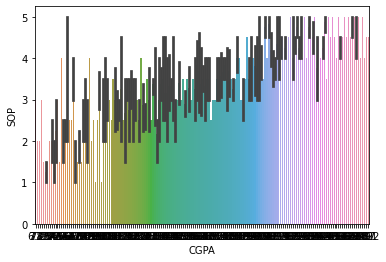

In [36]:
sns.barplot(data['CGPA'],data['SOP'])

C:\Users\Saravana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

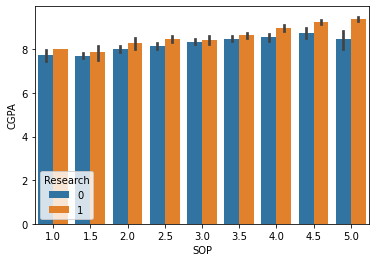

In [37]:
sns.barplot(data['SOP'],data['CGPA'], hue = data['Research'])

## SPLITTING DEPENDENT AND INDEPENDENT COLUMNS


In [38]:
x=data.iloc[:,0:7].values
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   4.5 ,   9.65],
       [  2.  , 324.  , 107.  , ...,   4.  ,   4.5 ,   8.87],
       [  3.  , 316.  , 104.  , ...,   3.  ,   3.5 ,   8.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   5.  ,   4.5 ,   9.45],
       [399.  , 312.  , 103.  , ...,   3.5 ,   4.  ,   8.78],
       [400.  , 333.  , 117.  , ...,   5.  ,   4.  ,   9.66]])

In [39]:
y=data.iloc[:,7:].values
y

array([[1.  , 0.92],
       [1.  , 0.76],
       [1.  , 0.72],
       [1.  , 0.8 ],
       [0.  , 0.65],
       [1.  , 0.9 ],
       [1.  , 0.75],
       [0.  , 0.68],
       [0.  , 0.5 ],
       [0.  , 0.45],
       [1.  , 0.52],
       [1.  , 0.84],
       [1.  , 0.78],
       [1.  , 0.62],
       [1.  , 0.61],
       [0.  , 0.54],
       [0.  , 0.66],
       [1.  , 0.65],
       [0.  , 0.63],
       [0.  , 0.62],
       [1.  , 0.64],
       [0.  , 0.7 ],
       [1.  , 0.94],
       [1.  , 0.95],
       [1.  , 0.97],
       [1.  , 0.94],
       [0.  , 0.76],
       [1.  , 0.44],
       [0.  , 0.46],
       [0.  , 0.54],
       [1.  , 0.65],
       [1.  , 0.74],
       [1.  , 0.91],
       [1.  , 0.9 ],
       [1.  , 0.94],
       [1.  , 0.88],
       [0.  , 0.64],
       [0.  , 0.58],
       [0.  , 0.52],
       [0.  , 0.48],
       [1.  , 0.46],
       [1.  , 0.49],
       [1.  , 0.53],
       [0.  , 0.87],
       [1.  , 0.91],
       [1.  , 0.88],
       [1.  , 0.86],
       [0.  ,

In [40]:
x.shape
(1991,7)

(1991, 7)

In [41]:
y.shape
(1991,1)

(1991, 1)

## SPLITTING THE DATE INTO TRAIN AND TEST

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [47]:
y_train = (y_train>0.5)
y_train

array([[ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True, False],
       [False, False],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False, False],
       [ True,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ Tr

In [48]:
y_test=(y_test>0.5)